# plot_likert guide

Welcome! This notebook aims to introduce you to the usage and options of plot_likert.  
Have questions or suggestions for improvement? Feel free to open an issue!

### Prerequisites

First, obviously, you'll need plot_likert itself. See homepage for installation instructions.

In [ ]:
import plot_likert

ModuleNotFoundError: No module named 'plot_likert'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls -1h /content/drive/My\Drive/ARXAI/Figure

Mounted at /content/drive
HALIE_survey_figure.pdf


<ipython-input-3-fdaefa1fd7dd>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


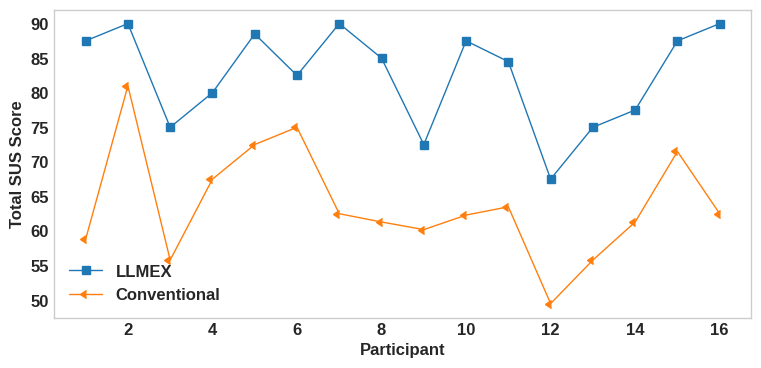

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, confusion_matrix, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.metrics import recall_score, classification_report, auc, roc_curve, make_scorer
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(4)
sickness_NM= [87.5, 90, 75, 80, 88.5, 82.5, 90, 85, 72.5, 87.5, 84.5, 67.5, 75, 77.5, 87.5, 90]
sickness_DFOV= [58.8, 81, 55.8, 67.5, 72.5, 75, 62.5, 61.3, 60.2, 62.3, 63.5, 49.5, 55.8, 61.3, 71.5, 62.5]
participant = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.plot(participant, sickness_NM, linewidth=1, linestyle='-', label='LLMEX',marker='s',markersize=6)
plt.plot(participant, sickness_DFOV, linewidth=1, linestyle='-', label='Conventional',marker=8,markersize=6)
legend_properties = {'weight':'bold','size':12}
plt.legend(loc='lower left',prop=legend_properties)
plt.xlabel('Participant',weight = 'bold',fontsize=12)
plt.ylabel('Total SUS Score',weight = 'bold',fontsize=12)
plt.yticks(weight = 'bold',fontsize=12)
plt.xticks(weight = 'bold',fontsize=12)
plt.grid(False)
#plt.savefig('/content/drive/My Drive/Mazedata/Without_teleportation/SUS_score_comp_new_updated.pdf',dpi=1000,format='pdf')
plt.show()

<Figure size 1700x400 with 0 Axes>

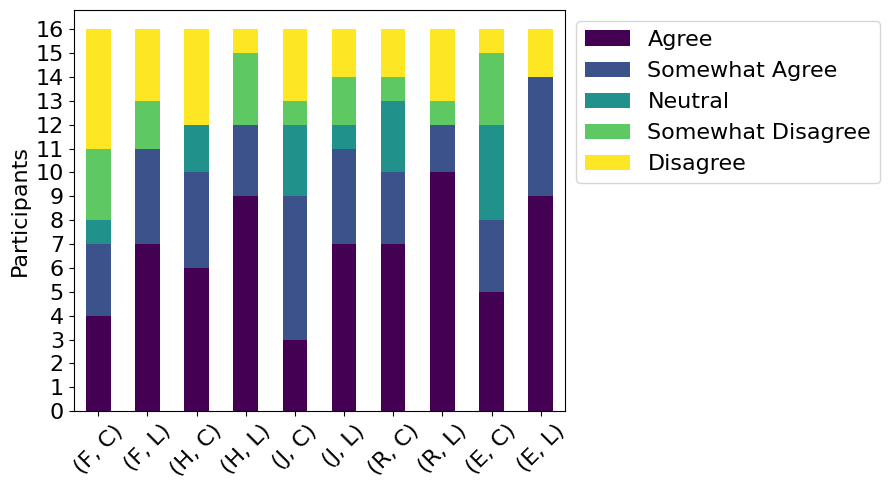

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
nested_dicts = {
    "statement 1": {
        "Agree": [4, 7],
        "Somewhat Agree": [3 ,4],
        "Neutral": [1, 0],
        "Somewhat Disagree": [3, 2],
        "Disagree": [5, 3]
        },
    "statement 2": {"Agree": [6, 9],
        "Somewhat Agree": [4, 3],
        "Neutral": [2, 0],
        "Somewhat Disagree": [0, 3],
        "Disagree": [4, 1]
        },
    "statement 3": {"Agree": [3, 7],
        "Somewhat Agree": [6, 4],
        "Neutral": [3, 1],
        "Somewhat Disagree": [1, 2],
        "Disagree": [3, 2]
        },
    "statement 4": {
        "Agree": [7, 10],
        "Somewhat Agree": [3 ,2],
        "Neutral": [3, 0],
        "Somewhat Disagree": [1, 1],
        "Disagree": [2, 3]
        },
    "statement 5": { "Agree": [5, 9],
        "Somewhat Agree": [3, 5],
        "Neutral": [4, 0],
        "Somewhat Disagree": [3, 0],
        "Disagree": [1, 2]
        }

    }
df = pd.concat({key:pd.DataFrame(nested_dicts[key]) for key in nested_dicts.keys()}).stack()#.unstack(0).stack()
plotdata = df.unstack()
#plotdata = pd.DataFrame(plotdata).unstack()
my_colors=[(.9,.4,.6),(.1,.3,.8),(.5,.2,.7),(.1,.1,.1),(.3,.1,.2)]
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(4)
iterables = [["F", "H", "J", "R", "E"], ["C", "L"]]
plotdata= plotdata.set_index(pd.MultiIndex.from_product(iterables, names=["first", "second"]))
plotdata.plot(kind="bar",figsize=(9, 5),rot=45,colormap = 'viridis',grid= False,stacked=True,yticks= range(2))
#plt.title("FIFA ratings")
#legend_properties = {'weight':'bold','size':11}
plt.xlabel("")
plt.ylabel("Participants",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(range(17), fontsize=16)
#plt.legend(prop=legend_properties, loc='upper right', shadow = True, facecolor = 'green')
plt.legend(bbox_to_anchor=(1, 1), prop = {'size':16 }, loc='upper left')
plt.tight_layout()
#legend1 = plt.legend(prop = { 'weight':'bold','size':12 }, loc='upper right', facecolor='lightyellow', labelcolor='red')
#plt.gca().add_artist(legend1)
plt.savefig('/content/drive/My Drive//ARXAI/Figure/HALIE_survey_figure.pdf',format='pdf')

In [ ]:
pip install plot-likert

In [ ]:
import plot_likert

plot_likert operates on [Pandas](https://pandas.pydata.org/) [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), so you'll need Pandas as well.

In [ ]:
import pandas as pd

Pandas uses [NumPy](https://numpy.org/) under the hood. You won't need it directly, but this notebook will use it for a couple of things, like random number generation.

In [ ]:
import numpy as np

# Quick start

If you have the data in the right format, you can make a plot with just one line of code!  

So, let's get some data:

In [ ]:
rng = np.random.default_rng(seed=42)
data = pd.DataFrame(rng.choice(plot_likert.scales.agree, (10,2)), columns=['Q1','Q2'])

In [ ]:
data

,Q1,Q2
0,Strongly disagree,Agree
1,Agree,Neither agree nor disagree
2,Neither agree nor disagree,Strongly agree
3,Strongly disagree,Agree
4,Disagree,Strongly disagree
5,Neither agree nor disagree,Strongly agree
6,Agree,Agree
7,Agree,Agree
8,Neither agree nor disagree,Strongly disagree
9,Strongly agree,Neither agree nor disagree


and now, the magic happens:

/usr/local/lib/python3.10/dist-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


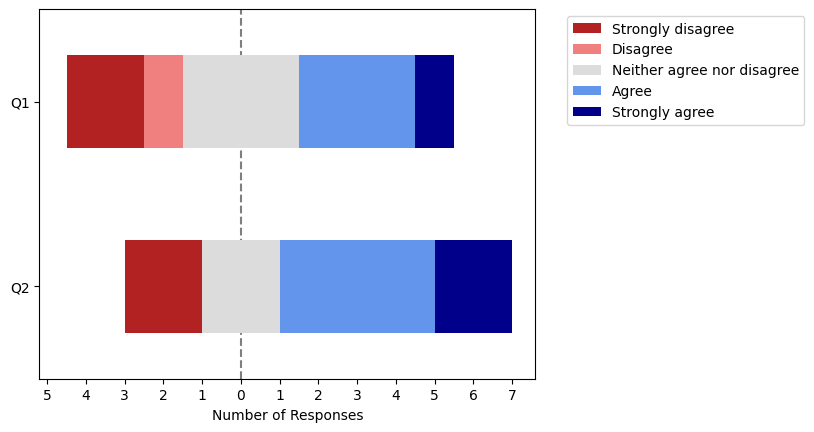

In [ ]:
plot_likert.plot_likert(data, plot_likert.scales.agree);

In [ ]:
plot_likert.scales.agree

['Strongly disagree',
 'Disagree',
 'Neither agree nor disagree',
 'Agree',
 'Strongly agree']

# Inputs

Now you know how easy it can be to start using plot_likert. But we said that the data has to be in the right format. What does that mean exactly? Let's take a look at what we passed in to the function:

In [ ]:
data

,Q1,Q2
0,Strongly disagree,Agree
1,Agree,Neither agree nor disagree
2,Neither agree nor disagree,Strongly agree
3,Strongly disagree,Agree
4,Disagree,Strongly disagree
5,Neither agree nor disagree,Strongly agree
6,Agree,Agree
7,Agree,Agree
8,Neither agree nor disagree,Strongly disagree
9,Strongly agree,Neither agree nor disagree


To make our assumptions explicit:

1. The input has to be a [Pandas](https://pandas.pydata.org/) [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
2. Each row represents a response from a single respondent
3. Each cell contains their response, preferably as a string
4. Each column represents a different question asked to each respondent

## Scales
The second input to the `plot_likert` function is the _scale_ you're using for your questions,
i.e., your questions' answer choices.  
Here's what it looked like for the dataset above:

In [ ]:
plot_likert.scales.agree

['Strongly disagree',
 'Disagree',
 'Neither agree nor disagree',
 'Agree',
 'Strongly agree']

You need to specify the scale explicitly because plot_likert needs to know the order of the scale (for colors and sorting), and in case there are any values in the scale that aren't represented in your dataset.

The scale is an array of strings, so you can construct one yourself.

In [ ]:
another_scale = \
    ['strongly disagree',
     'disagree',
     'neither agree nor disagree',
     'agree',
     'strongly agree']

### Scale must match inputs exactly

The scale you pass in must match the data exactly, otherwise a `PlotLikertError` is raised.
For example, the scale we just constructed has the fields in lower-case, but the data has the words capitalized. Trying to plot now throws an exception.

In [ ]:
try:
    plot_likert.plot_likert(data, another_scale);
    print("Yay, everything worked!")
except plot_likert.PlotLikertError as e:
    import sys
    print("Oh no, something went wrong! The message in the exception is:\n" + str(e), file=sys.stderr)

Oh no, something went wrong! The message in the exception is:
A response was found with value `Strongly disagree`, which is not one of the values in the provided scale: ['strongly disagree', 'disagree', 'neither agree nor disagree', 'agree', 'strongly agree']. If this is unexpected, you might want to double-check for extra whitespace, capitalization, spelling, or type (int versus str).


### Bundled scales

For your convenience, plot_likert [includes some commonly used scales](https://github.com/nmalkin/plot-likert/blob/master/plot_likert/scales.py), for example:

In [ ]:
plot_likert.scales.acceptable

['Completely unacceptable',
 'Somewhat unacceptable',
 'Neutral',
 'Somewhat acceptable',
 'Completely acceptable']

In [ ]:
plot_likert.scales.raw5

['1', '2', '3', '4', '5']

If you'd like to add a scale, please open a pull request.

### Missing data

If not all of your respondents answered every question, you might have empty cells.
This works fine.
However, you'll get [a warning](https://docs.python.org/3/library/warnings.html) if you're plotting percentages (see below).

In [ ]:
missing_data = data.copy()
missing_data.iloc[0,0] = np.NaN

# This produces a warning:
#plot_likert.plot_likert(missing_data, plot_likert.scales.agree, plot_percentage=True);

# Outputting the figure to a file

A call to the `plot_likert.plot_likert` function returns a [matplotlib.Axes](https://matplotlib.org/stable/api/axes_api.html) object. This can be used to customize the figure (more on this below), but it is also needed to save the plotted figure to a file:

In [ ]:
%%capture
# ^ Don't show the plot in this example

axes = plot_likert.plot_likert(data, plot_likert.scales.agree);

axes.get_figure().savefig('sample_plot.png');

[`savefig` accepts a number of arguments](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.savefig) that may be useful, for example `dpi` to make the figure higher-resolution, or `bbox_inches` to constrain the bounding boxes:

In [ ]:
axes.get_figure().savefig('sample_plot.png', dpi=300, bbox_inches='tight')

# Plotting percentages

Often, instead of plotting the raw number of responses, you'll want to plot the percentage of respondents who answered a certain way. You can do this by setting the argument `plot_percentage=True`:

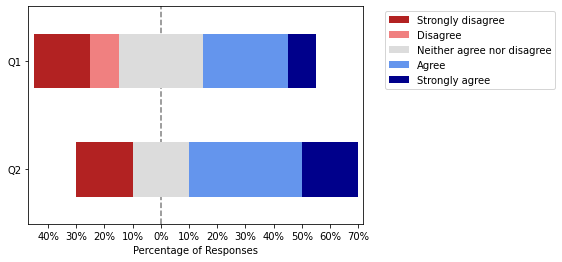

In [ ]:
plot_likert.plot_likert(data, plot_likert.scales.agree,
                        plot_percentage=True);

# Customizing colors

You can change the colors used in the plot by passing in an array of color values as the `colors` argument:

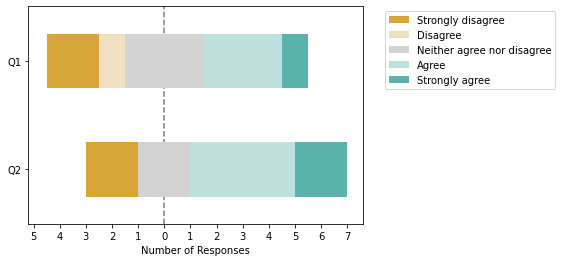

In [ ]:
plot_likert.plot_likert(data, plot_likert.scales.agree,
                        colors=plot_likert.colors.likert5);

This is mandatory if you're using a scale that has more than 5 values.

Some default color schemes [are provided under `plot_likert.colors`](https://github.com/nmalkin/plot-likert/blob/master/plot_likert/colors.py).
A color scheme is just an array of [matplotlib color values](https://matplotlib.org/tutorials/colors/colors.html), so you can also construct your own:

In [ ]:
my_color_scheme =[
    plot_likert.colors.TRANSPARENT,
    "red",
    "orange",
    "green",
    "blue",
    "violet",
]

Note that the first color in the color scheme must be transparent (e.g., `"#ffffff00"`).

# Labeling bar values

You can add a label with each bar segment's value by setting the `bar_labels` argument to `True`.
The default color of the text is white, but you can change it with the `bar_labels_color` argument
(which accepts a single color or an array of them).

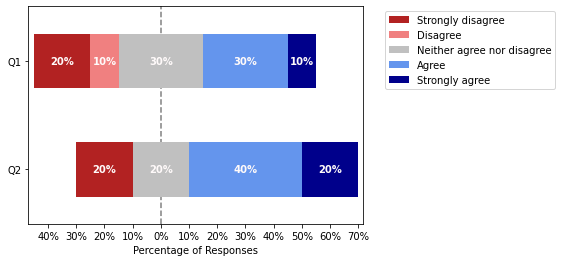

In [ ]:
plot_likert.plot_likert(data, plot_likert.scales.agree, plot_percentage=True,
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral);

# Changing the figure size

The default size of the plot can be pretty cramped. You can adjust the figure size using the `figsize` argument. This specifies the dimensions of the figure in inches. This argument is passed directly to [matplotlib](https://matplotlib.org), so [see its documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) for any questions.

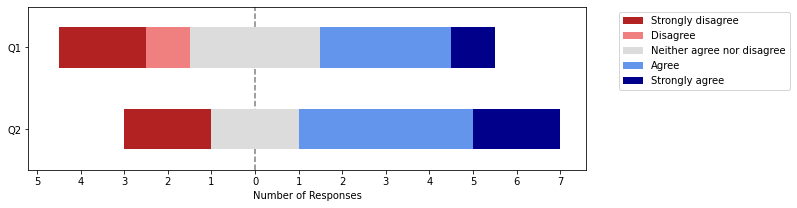

In [ ]:
plot_likert.plot_likert(data, plot_likert.scales.agree,
                        figsize=(10,3));

You can do more advanced customization too:

# Controlling the plot

The plotting function returns a [matplotlib Axes object](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes), which you can use to customize the figure, just as you would with any other matplotlib plot.

Here's a quick example:

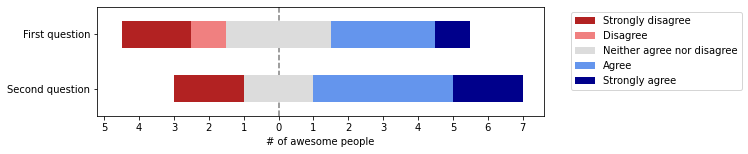

In [ ]:
ax = plot_likert.plot_likert(data, plot_likert.scales.agree)

ax.figure.set_size_inches(8, 2)
ax.xaxis.set_label_text('# of awesome people');
ax.set_yticklabels(['Second question', 'First question']);

Instead of manipulating the axes after they've been returned, you can also pass them in first, to enable even more advanced customization:

# More advanced plots

You can pass a [matplotlib Axis](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) and other options as arguments in order to build more advanced plots. These values will be passed through to [pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) (which in turn may pass some of them through to matplotlib); see its documentation for details.

In [ ]:
# We import matplotlib in order to control the whole figure.
import matplotlib.pyplot as plt

In this example, we're plotting two Likert plots side-by-side for comparison purposes — in this case, comparing absolute values vs percentages. Notice that we're using different bar widths.

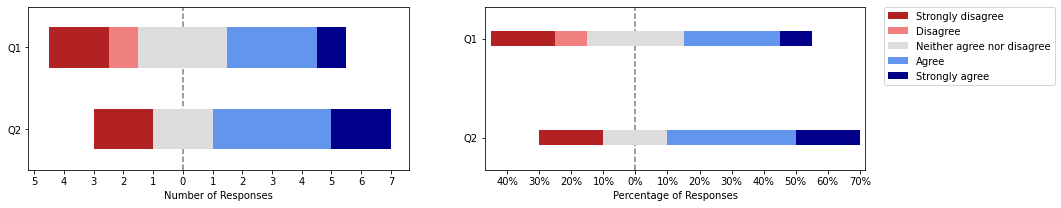

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
plot_likert.plot_likert(data, plot_likert.scales.agree,
                        plot_percentage=False,  # show absolute values
                        ax=ax1,  # show on the left-side subplot
                        legend=0,  # hide the legend for the subplot, we'll show a single figure legend instead
                       );
plot_likert.plot_likert(data, plot_likert.scales.agree,
                        plot_percentage=True,  # show percentage values
                        ax=ax2,  # show on the right-side subplot
                        legend=0,  # hide the legend for the subplot, we'll show a single figure legend instead
                        width=0.15  # make the bars slimmer
                       );

# display a single legend for the whole figure
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.08, .9))
plt.show()

# Plotting already-aggregated data

The `plot_likert` function we've been using operates on "raw" responses:
a DataFrame that has a row for each response (as discussed above).
However, it's possible your data has a different shape,
and/or you have already aggregated the data,
and just want to plot it.
plot_likert provides a solution for this too!

Just take your aggregated counts:

In [ ]:
precomputed_counts = pd.DataFrame(
    {'Strongly disagree': {'Q1': 2.0, 'Q2': 2.0},
     'Disagree': {'Q1': 1.0, 'Q2': 0.0},
     'Neither agree nor disagree': {'Q1': 3.0, 'Q2': 2.0},
     'Agree': {'Q1': 3.0, 'Q2': 4.0},
     'Strongly agree': {'Q1': 1.0, 'Q2': 2.0}}
)
precomputed_counts

,Strongly disagree,Disagree,Neither agree nor disagree,Agree,Strongly agree
Q1,2.0,1.0,3.0,3.0,1.0
Q2,2.0,0.0,2.0,4.0,2.0


…and pass them to the `plot_counts` function:

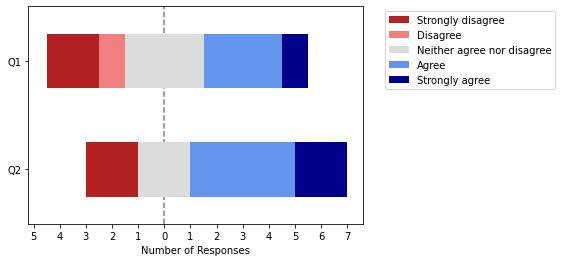

In [ ]:
plot_likert.plot_counts(precomputed_counts, plot_likert.scales.agree);

Voilà!

`plot_counts` takes the same arguments documented above, so you can customize the plot exactly the same way.